In [11]:
import pandas as pd
data=pd.read_csv("C:\\Users\\sawst\\Downloads\\archive (1)\\Apple Dataset.csv")

In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.shape

(10954, 7)

In [7]:
data.head

<bound method NDFrame.head of              Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099058   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093890   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086999   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089152   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091737   
...           ...         ...         ...         ...         ...         ...   
10949  2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
10950  2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
10951  2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
10952  2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   
10953  2024-05-24  188.820007  190.580002  188.039993  189.979996  189.979996  

In [9]:
data.tail

<bound method NDFrame.tail of              Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099058   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093890   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086999   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089152   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091737   
...           ...         ...         ...         ...         ...         ...   
10949  2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
10950  2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
10951  2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
10952  2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   
10953  2024-05-24  188.820007  190.580002  188.039993  189.979996  189.979996  

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10954 non-null  object 
 1   Open       10954 non-null  float64
 2   High       10954 non-null  float64
 3   Low        10954 non-null  float64
 4   Close      10954 non-null  float64
 5   Adj Close  10954 non-null  float64
 6   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB


In [13]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10954.000000,10954.000000,10954.000000,10954.000000,10954.000000,1.095400e+04
mean,21.530877,21.761904,21.308220,21.544072,20.747506,3.190792e+08
std,44.458386,44.931856,44.013578,44.492483,44.038943,3.357446e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.296875,0.303571,0.290179,0.296875,0.241624,1.139936e+08
50%,0.522321,0.533482,0.513393,0.524554,0.427333,2.067128e+08
75%,19.767500,19.888572,19.457768,19.682679,17.048054,3.993444e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


In [15]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

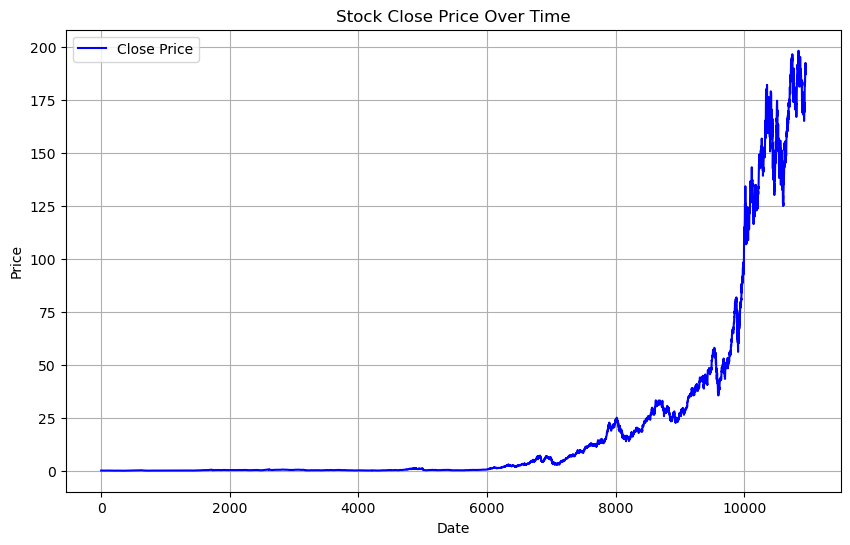

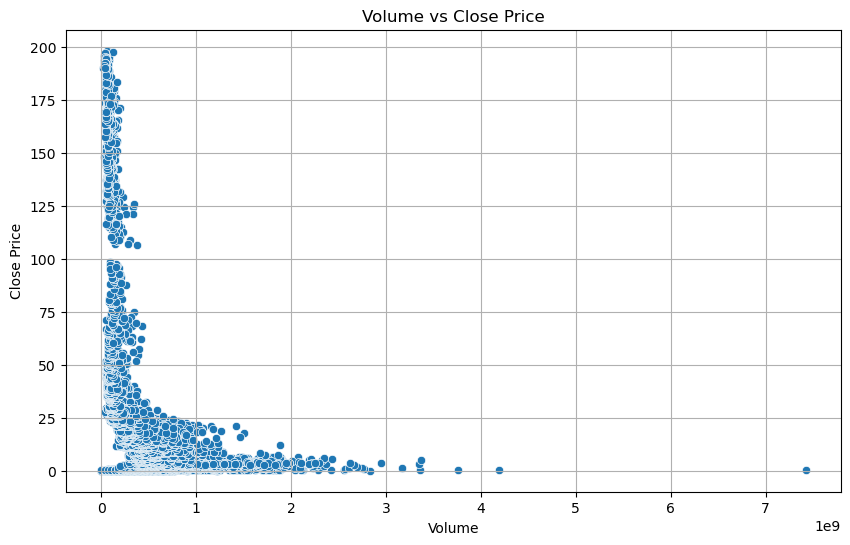

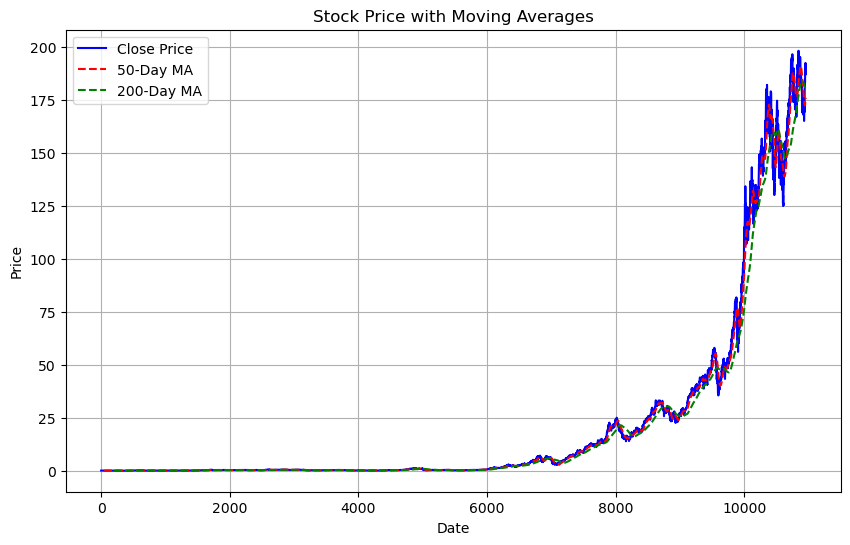

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='b')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Volume'], y=data['Close'])
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='b')
plt.plot(data.index, data['50_MA'], label='50-Day MA', color='r', linestyle='--')
plt.plot(data.index, data['200_MA'], label='200-Day MA', color='g', linestyle='--')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

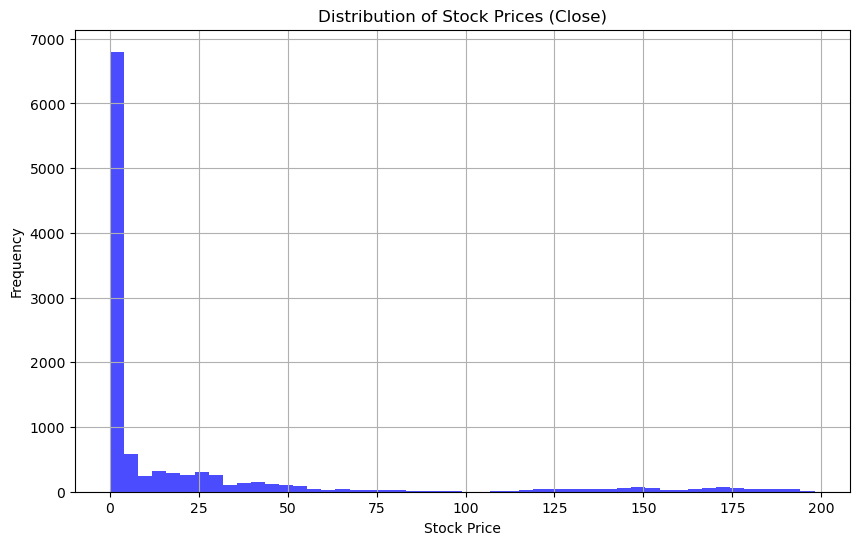

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(data['Close'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Stock Prices (Close)')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
stock_data = pd.read_csv('C:\\Users\\sawst\\Downloads\\archive (1)\\Apple Dataset.csv')

In [156]:
X = stock_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = stock_data['Close']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train

LinearRegression()

In [164]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [166]:

y_pred_lr = linear_reg.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

In [168]:
hybrid_predictions = (y_pred_lr + y_pred_rf) / 2

mse_hybrid = mean_squared_error(y_test, hybrid_predictions)
print(f"Hybrid Model MSE: {mse_hybrid}")

Hybrid Model MSE: 0.04112767126112092


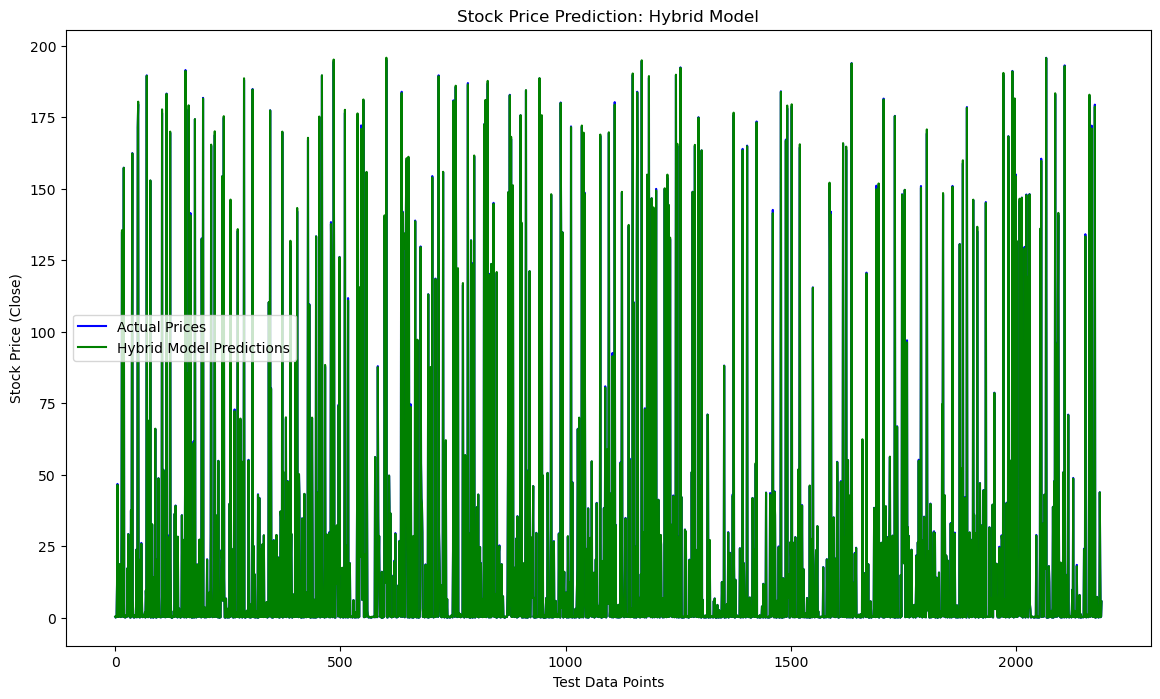

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(hybrid_predictions, label='Hybrid Model Predictions', color='green')
plt.title('Stock Price Prediction: Hybrid Model')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.show()

In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_hybrid = mean_absolute_error(y_test, hybrid_predictions)
print(f"Hybrid Model MAE: {mae_hybrid}")
mse_hybrid = mean_squared_error(y_test, hybrid_predictions)
print(f"Hybrid Model MSE: {mse_hybrid}")
rmse_hybrid = mean_squared_error(y_test, hybrid_predictions, squared=False)
print(f"Hybrid Model RMSE: {rmse_hybrid}")
r2_hybrid = r2_score(y_test, hybrid_predictions)
print(f"Hybrid Model R²: {r2_hybrid}")

Hybrid Model MAE: 0.09064218707340622
Hybrid Model MSE: 0.04112767126112092
Hybrid Model RMSE: 0.20279958397669587
Hybrid Model R²: 0.9999793514335614


C:\Users\sawst\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
stock_data = pd.read_csv('C:\\Users\\sawst\\Downloads\\archive (1)\\Apple Dataset.csv')
X = stock_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = stock_data['Close']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
linear_reg = LinearRegression().fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_lr_val = linear_reg.predict(X_val)
y_pred_rf_val = rf_model.predict(X_val)
hybrid_predictions_val = (y_pred_lr_val + y_pred_rf_val) / 2
mae_val = mean_absolute_error(y_val, hybrid_predictions_val)
mse_val = mean_squared_error(y_val, hybrid_predictions_val)
rmse_val = mean_squared_error(y_val, hybrid_predictions_val, squared=False)
r2_val = r2_score(y_val, hybrid_predictions_val)
print("Validation Metrics:")
print(f"MAE: {mae_val}, MSE: {mse_val}, RMSE: {rmse_val}, R²: {r2_val}")
y_pred_lr_test = linear_reg.predict(X_test)
y_pred_rf_test = rf_model.predict(X_test)
hybrid_predictions_test = (y_pred_lr_test + y_pred_rf_test) / 2
mae_test = mean_absolute_error(y_test, hybrid_predictions_test)
mse_test = mean_squared_error(y_test, hybrid_predictions_test)
rmse_test = mean_squared_error(y_test, hybrid_predictions_test, squared=False)
r2_test = r2_score(y_test, hybrid_predictions_test)
print("Test Metrics:")
print(f"MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R²: {r2_test}")

Validation Metrics:
MAE: 0.08795248687597702, MSE: 0.03909487035588528, RMSE: 0.19772422804473225, R²: 0.9999787715144155
Test Metrics:
MAE: 0.093068109678952, MSE: 0.0449236199989747, RMSE: 0.2119519285096852, R²: 0.999977420624495


C:\Users\sawst\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sawst\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  
y = data['Adj Close'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_reg = LinearRegression()
random_forest = RandomForestRegressor()
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
print("Please enter the following values:")
open_price = float(input("Enter Open price: "))
high_price = float(input("Enter High price: "))
low_price = float(input("Enter Low price: "))
close_price = float(input("Enter Close price: "))
volume = int(input("Enter Volume: "))
user_data = pd.DataFrame({
    'Open': [open_price],
    'High': [high_price],
    'Low': [low_price],
    'Close': [close_price],
    'Volume': [volume]
})
user_pred_lr = linear_reg.predict(user_data)
user_pred_rf = random_forest.predict(user_data)
user_pred_hybrid = (user_pred_lr + user_pred_rf) / 2
print(f"\nThe predicted 'Adj Close' value is: {user_pred_hybrid[0]:.2f}")

Please enter the following values:


Enter Open price:  145.23
Enter High price:  148.75
Enter Low price:  144.00
Enter Close price:  146.50
Enter Volume:  3000000



The predicted 'Adj Close' value is: 144.55
